In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>
ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


# Ejercicio: Redes Neuronales para clasificación de ropa

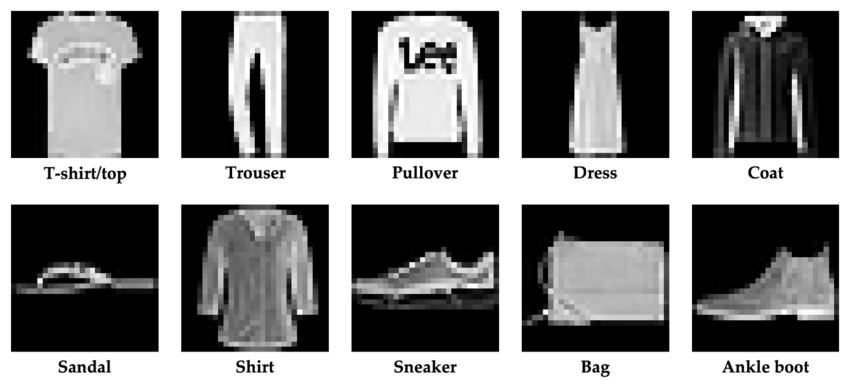

Cargamos el dataset FashionmNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Normalizamos las imágenes (0-1)

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## PARTE A: Entrenado una red neuronal simple para imágenes

Armamos la arquiteectura del modelo

In [ ]:
dense_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
y_train

Compilamos el modelo

In [ ]:
dense_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

Entrenamos el modelo

In [ ]:
history_dense = dense_model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Evaluamos en el test set

In [ ]:
test_loss, test_acc = dense_model.evaluate(x_test, y_test)
print("Test accuracy (Dense Model):", test_acc)

Graficamos el rendimiento de la Red Neuronal

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dense.history['loss'], label='Train Loss')
plt.plot(history_dense.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Dense Model - Loss")

plt.subplot(1, 2, 2)
plt.plot(history_dense.history['accuracy'], label='Train Acc')
plt.plot(history_dense.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Dense Model - Accuracy")
plt.show()

# PARTE B: Entrenando una Convolutional Neural Network

Creamos un modelo con ConvNets

In [ ]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Compilamos el modelo

In [ ]:
# Definimos el callback de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Compilamos el modelo
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

Entrenamos el modelo

In [ ]:
history_cnn = cnn_model.fit(x_train, y_train,
              validation_split=0.2,
              epochs=50,
              batch_size=32,
              callbacks=[early_stopping])

Evaluamos en el test set

In [ ]:
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(x_test, y_test)
print("Test accuracy (ConvNet Model):", test_acc_cnn)

Graficamos

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("ConvNet Model - Loss")

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Train Acc')
plt.plot(history_cnn.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("ConvNet Model - Accuracy")
plt.show()